In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('Brazil Dew.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Dew Point
Date,,
2020-03-04,1,21.861111
2020-03-05,4,22.083333
2020-03-06,6,22.185185
2020-03-07,6,21.935185
2020-03-08,6,22.009259


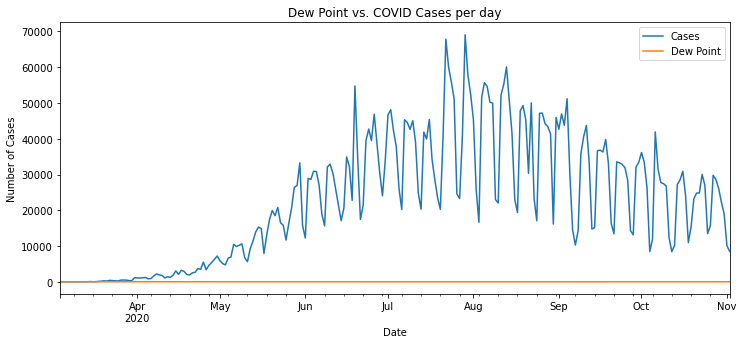

In [4]:
title = 'Dew Point vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Dew Point'].plot(legend=True);

In [5]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [6]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.581012
p-value                   0.493124
# lags used              15.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [7]:
adf_test(df['Dew Point'], title='Dew')

Augmented Dickey-Fuller Test: Dew
ADF test statistic       -2.094117
p-value                   0.246887
# lags used               2.000000
# observations          241.000000
critical value (1%)      -3.457779
critical value (5%)      -2.873609
critical value (10%)     -2.573202
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [8]:
df_transformed = df.diff()

In [9]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Dew Point'], title='DewFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -4.440804
p-value                   0.000251
# lags used              15.000000
# observations          227.000000
critical value (1%)      -3.459490
critical value (5%)      -2.874358
critical value (10%)     -2.573602
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: DewFirstDiff
ADF test statistic     -1.339559e+01
p-value                 4.674312e-25
# lags used             1.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [10]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Dew Point'], title='DewSecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic     -9.559166e+00
p-value                 2.452263e-16
# lags used             1.300000e+01
# observations          2.280000e+02
critical value (1%)    -3.459361e+00
critical value (5%)    -2.874302e+00
critical value (10%)   -2.573571e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: DewSecondDiff
ADF test statistic     -7.675913e+00
p-value                 1.549064e-11
# lags used             1.400000e+01
# observations          2.270000e+02
critical value (1%)    -3.459490e+00
critical value (5%)    -2.874358e+00
critical value (10%)   -2.573602e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [11]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [12]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  20.22518347202447
BIC:  20.254626752995907

Order = 1
AIC:  19.961836947678634
BIC:  20.0504349249955

Order = 2
AIC:  19.6549874236265
BIC:  19.803100661976963

Order = 3
AIC:  19.53719092873724
BIC:  19.74518370116538

Order = 4
AIC:  19.454539836900626
BIC:  19.722780177980244

Order = 5
AIC:  19.134504486259935
BIC:  19.463364246243895

Order = 6
AIC:  18.593923338721762
BIC:  18.983778238688622

Order = 7
AIC:  18.43041488079394
BIC:  18.88164456881426

Order = 8
AIC:  18.337233908316016
BIC:  18.850222016661245

Order = 9
AIC:  18.33693038614949
BIC:  18.912064589566956

Order = 10
AIC:  18.345424954978267
BIC:  18.983097030056424

Order = 11
AIC:  18.341462235485377
BIC:  19.042068121134182

Order = 12
AIC:  18.382240770675786
BIC:  19.146180629747562

Order = 13
AIC:  18.36266719018011
BIC:  19.19034547225715

Order = 14
AIC:  18.205187899132994
BIC:  19.097013404508694

Order = 15
AIC:  18.212713986374865
BIC:  19.169099931255985

Order = 16
AIC:  18.2490441375

In [13]:
results = model.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Dec, 2020
Time:                     16:35:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    18.9838
Nobs:                     229.000    HQIC:                   18.7512
Log likelihood:          -2752.88    FPE:                1.18945e+08
AIC:                      18.5939    Det(Omega_mle):     1.06509e+08
--------------------------------------------------------------------
Results for equation Cases
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -4.349715       518.528320           -0.008           0.993
L1.Cases            -0.969318         0.051144          -18.953           0.000
L1.Dew Point      -604.979155       404.084048           -1.497 

In [14]:
lag_order = results.k_ar
lag_order

6

In [15]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[ 3.33652489e+03,  7.23138754e-01],
       [-3.24134045e+03, -1.64859994e-01],
       [-1.02243696e+03, -1.93751343e-02],
       [ 1.78144497e+03, -1.52226030e-01],
       [-9.92480192e+03, -1.97280206e-01],
       [-9.65577946e+02,  2.21712524e-01],
       [ 1.09859715e+04,  2.25741524e-01]])

In [16]:
test

,Cases,Dew Point
Date,,
2020-10-27,11828.0,0.183333
2020-10-28,-15219.0,0.314815
2020-10-29,-1365.0,0.075926
2020-10-30,-1301.0,-0.864814
2020-10-31,489.0,0.575925
2020-11-01,-5512.0,-1.024074
2020-11-02,7248.0,-0.933333


In [17]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Dew2d'])
df_forecast

,Cases2d,Dew2d
2020-10-27,3336.524888,0.723139
2020-10-28,-3241.340453,-0.164860
2020-10-29,-1022.436962,-0.019375
2020-10-30,1781.444967,-0.152226
2020-10-31,-9924.801920,-0.197280
2020-11-01,-965.577946,0.221713
2020-11-02,10985.971509,0.225742


In [18]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [19]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Dew1d'] = (df['Dew Point'].iloc[-nobs-1]-df['Dew Point'].iloc[-nobs-2]) + df_forecast['Dew2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['DewForecast'] = df['Dew Point'].iloc[-nobs-1] + df_forecast['Dew1d'].cumsum()

In [20]:
df_forecast

,Cases2d,Dew2d,Cases1d,CasesForecast,Dew1d,DewForecast
2020-10-27,3336.524888,0.723139,5569.524888,21295.524888,0.623139,21.400917
2020-10-28,-3241.340453,-0.164860,2328.184436,23623.709324,0.458279,21.859196
2020-10-29,-1022.436962,-0.019375,1305.747474,24929.456798,0.438904,22.298099
2020-10-30,1781.444967,-0.152226,3087.192441,28016.649239,0.286678,22.584777
2020-10-31,-9924.801920,-0.197280,-6837.609478,21179.039760,0.089397,22.674174
2020-11-01,-965.577946,0.221713,-7803.187424,13375.852336,0.311110,22.985284
2020-11-02,10985.971509,0.225742,3182.784085,16558.636421,0.536851,23.522135


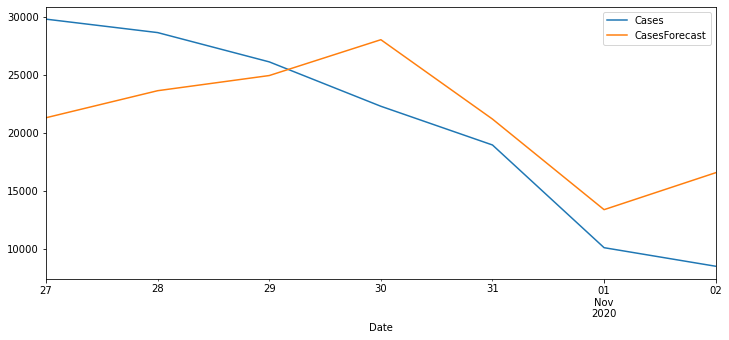

In [21]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);